In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv("Flight_Booking.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
df.shape

(300153, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [10]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [11]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [12]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


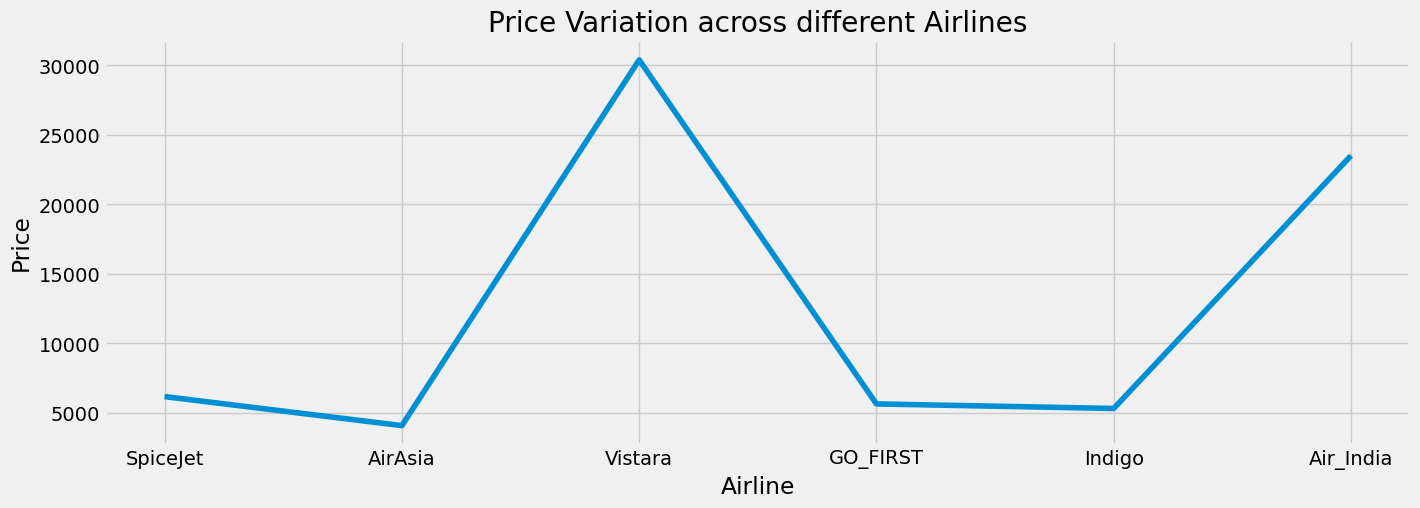

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'], y=df['price'])
plt.xlabel("Airline")
plt.ylabel("Price")
plt.title("Price Variation across different Airlines")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

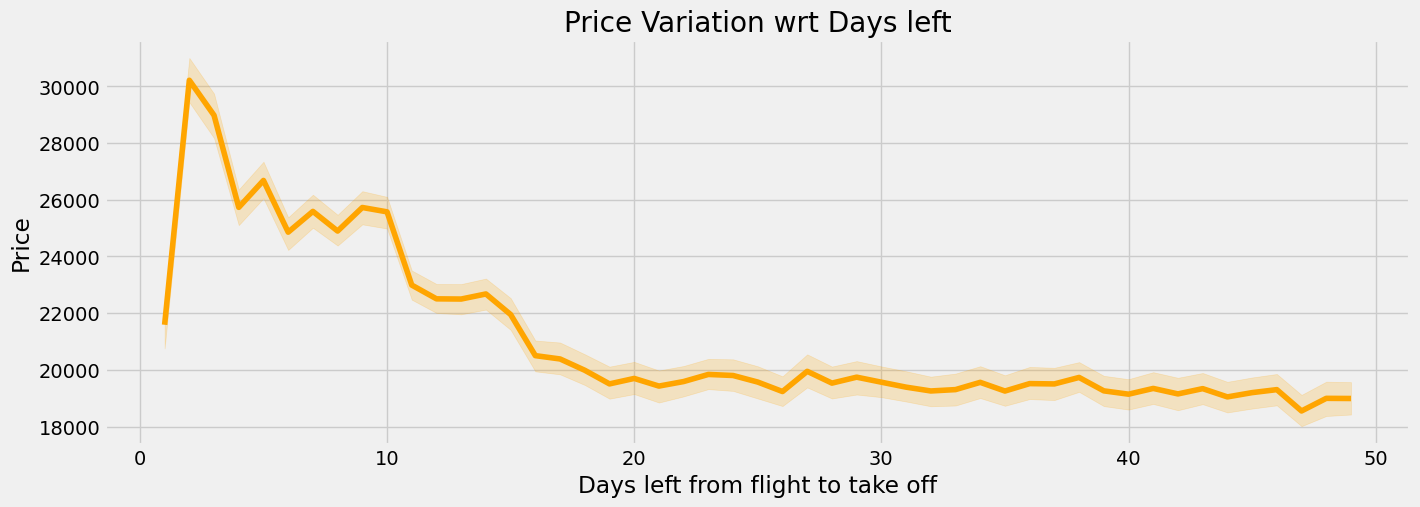

In [14]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['days_left'],y=df['price'], color='orange')
plt.xlabel("Days left from flight to take off")
plt.ylabel("Price")
plt.title("Price Variation wrt Days left")
plt.show

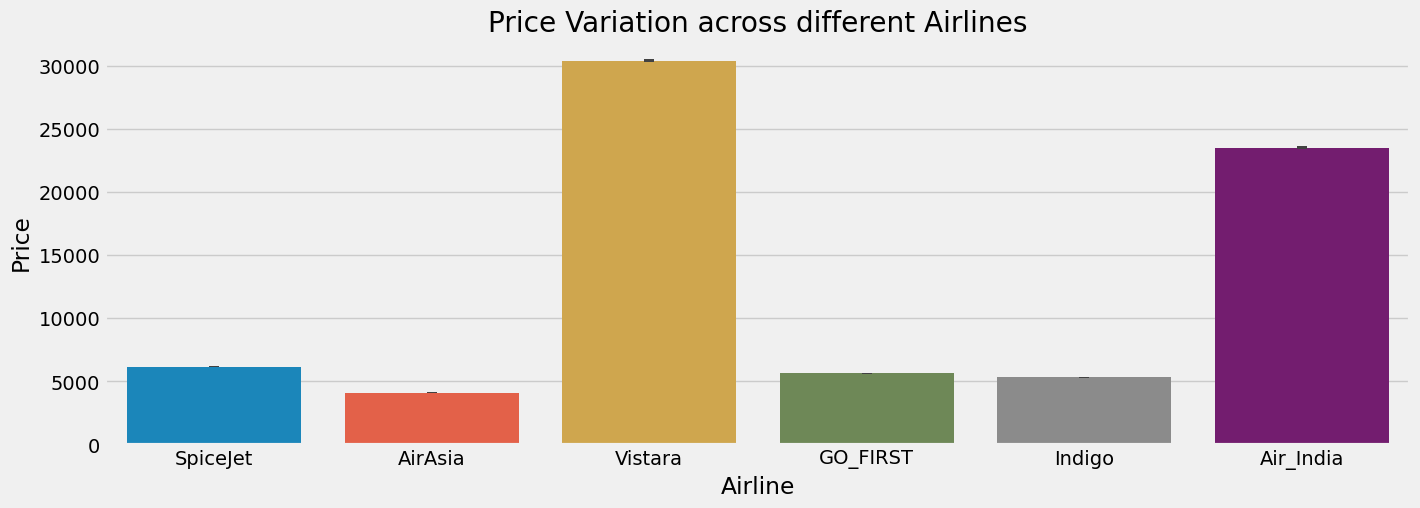

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['airline'], y=df['price'])
plt.xlabel("Airline")
plt.ylabel("Price")
plt.title("Price Variation across different Airlines")
plt.show()

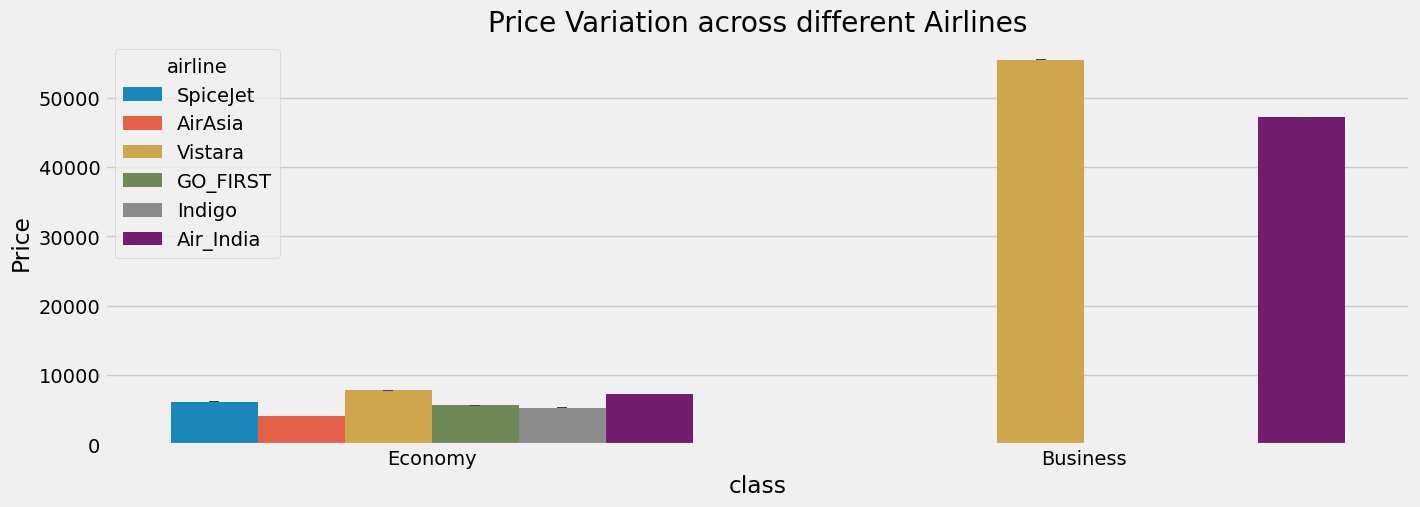

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['class'], y=df['price'],hue=df['airline'])
plt.xlabel("class")
plt.ylabel("Price")
plt.title("Price Variation across different Airlines")
plt.show()

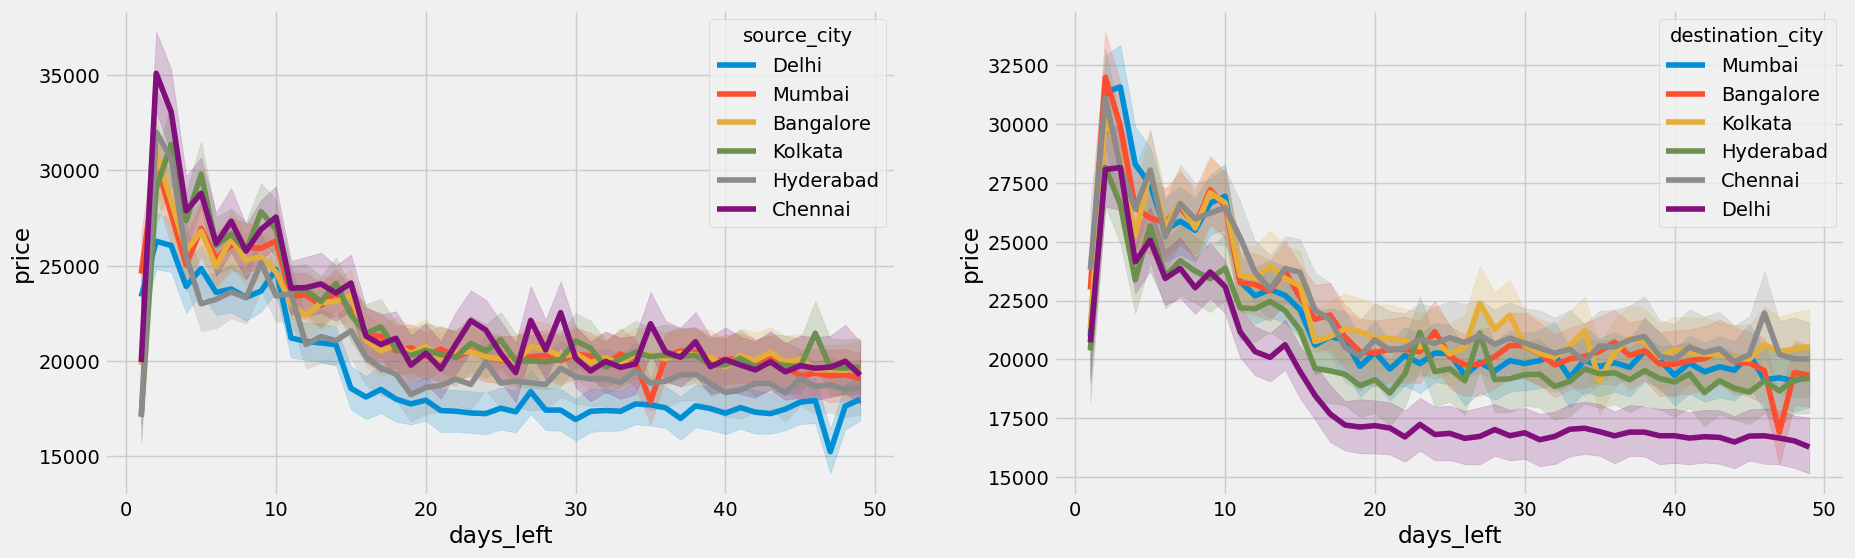

In [17]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df, hue='source_city', ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df, hue='destination_city', ax=ax[1])
plt.show()

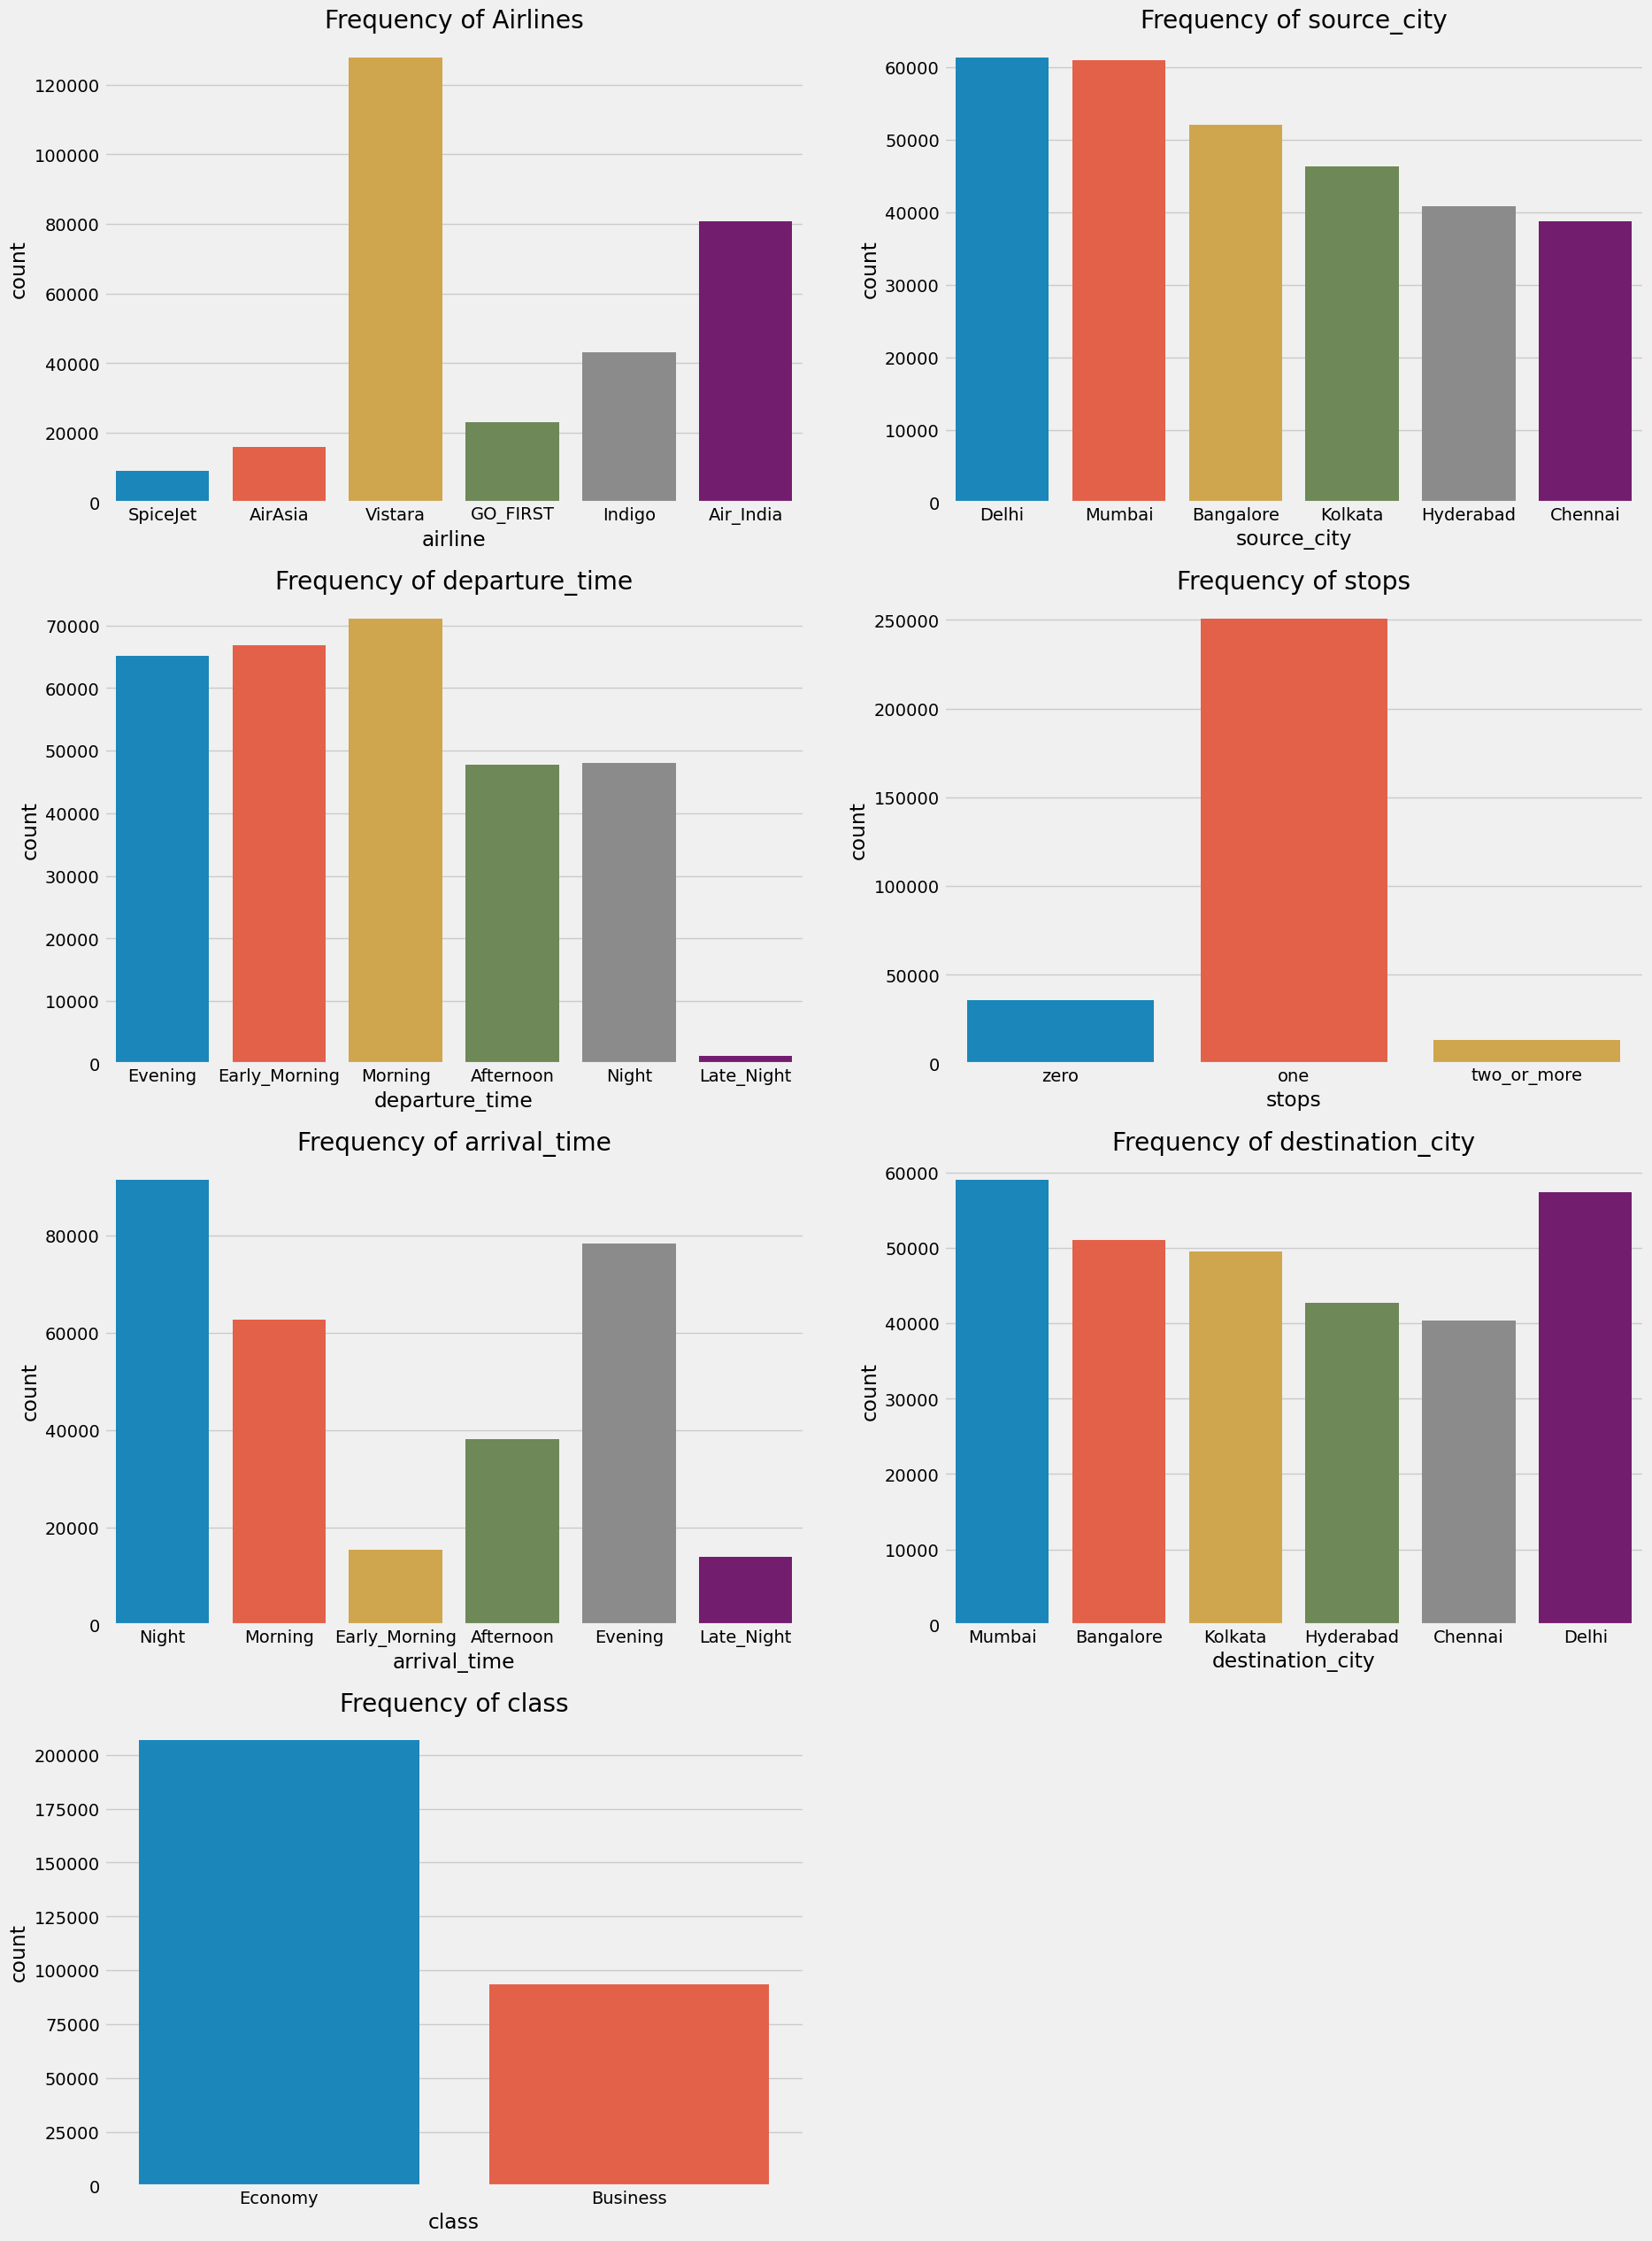

In [18]:
plt.figure(figsize=(20,30))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'])
plt.title("Frequency of Airlines")

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'])
plt.title("Frequency of source_city")

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'])
plt.title("Frequency of departure_time")

plt.subplot(4,2,4)
sns.countplot(x=df['stops'])
plt.title("Frequency of stops")

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'])
plt.title("Frequency of arrival_time")

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'])
plt.title("Frequency of destination_city")

plt.subplot(4,2,7)
sns.countplot(x=df['class'])
plt.title("Frequency of class")

plt.show()

In [19]:
col_list=[]
for i in df.columns:
    if df[i].dtype=='object':
        col_list.append(i)
        
print(col_list)

['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
for i in col_list:
    df[i]=le.fit_transform(df[i])

In [23]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 16.0 MB


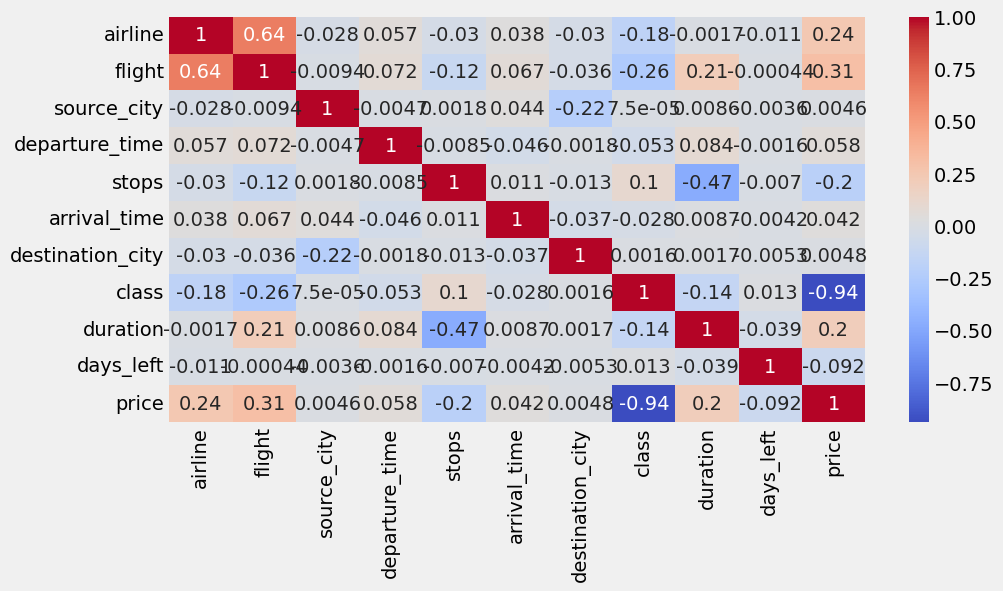

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
col=[]
for i in df.columns:
    if((df[i].dtype!='object')&(i!='price')):
        col.append(i)
print(col)

['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']


In [28]:
z=df[col]
vif_data=pd.DataFrame()
vif_data['Feature']=z.columns
vif_data['VIF']=[variance_inflation_factor(z.values,i) for i in range (len(z.columns))]
vif_data

,Feature,VIF
0,airline,6.701818
1,flight,12.675046
2,source_city,2.969540
3,departure_time,2.806009
4,stops,1.437326
5,arrival_time,3.784873
6,destination_city,2.918792
7,class,2.852072
8,duration,4.754588
9,days_left,4.071591


In [29]:
df=df.drop(columns=['flight'])

In [30]:
col=[]
for i in df.columns:
    if((df[i].dtype!='object')&(i!='price')):
        col.append(i)
print(col)

z=df[col]
vif_data=pd.DataFrame()
vif_data['Feature']=z.columns
vif_data['VIF']=[variance_inflation_factor(z.values,i) for i in range (len(z.columns))]
vif_data

['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']


,Feature,VIF
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [32]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [33]:
x=df.iloc[:,:-1]

In [34]:
y=df.iloc[:,-1:]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred=lr.predict(x_test)

In [39]:
error=pd.DataFrame()

In [40]:
error['Actual_value']=y_test

In [41]:
error['Predicted_value']=y_pred

In [42]:
error['Error']=error['Actual_value']-error['Predicted_value']

In [43]:
error.head()

,Actual_value,Predicted_value,Error
27131,7366,4585.880510,2780.119490
266857,64831,52842.077073,11988.922927
141228,6195,7877.980184,-1682.980184
288329,60160,56120.138579,4039.861421
97334,6578,6663.204177,-85.204177


In [44]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

In [45]:
r2_score(y_test,y_pred)

0.904554350718816

In [46]:
mean_abs_err=mean_absolute_error(y_test,y_pred)
mean_abs_err

4624.994868016877

In [47]:
mean_abs_per_err=mean_absolute_percentage_error(y_test,y_pred)
mean_abs_per_err

0.435358108968326

In [48]:
mean_sqr_err=mean_squared_error(y_test,y_pred)
mean_sqr_err

49200540.293721996

In [49]:
root_mean_square_error=np.sqrt(mean_sqr_err)
root_mean_square_error

7014.3096804833185

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


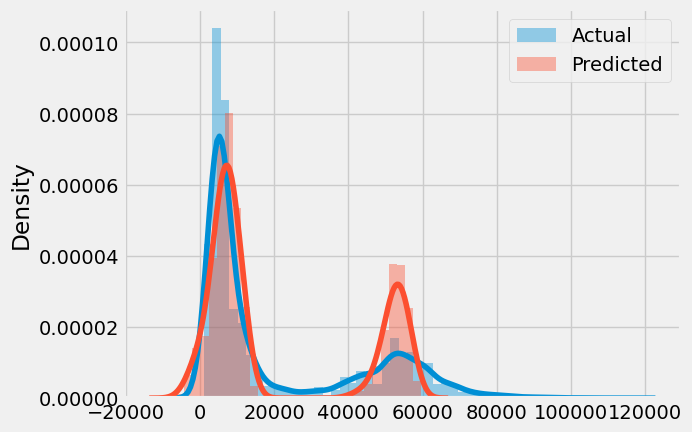

In [50]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()

## Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
dtr=DecisionTreeRegressor()

In [53]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [54]:
y_pred=dtr.predict(x_test)

In [55]:
r2_score(y_test,y_pred)

0.9754882171073274

In [56]:
mean_abs_per_err=mean_absolute_percentage_error(y_test,y_pred)
mean_abs_per_err

0.07415017713360465

In [57]:
mean_sqr_err=mean_squared_error(y_test,y_pred)
mean_sqr_err

12635389.574741475

In [58]:
mean_abs_err=mean_absolute_error(y_test,y_pred)
mean_abs_err

1177.525131459857

In [59]:
root_mean_square_error=np.sqrt(mean_sqr_err)
root_mean_square_error

3554.629316080859

In [60]:
## Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rfr=RandomForestRegressor()

In [65]:
rfr.fit(x_train,y_train)

C:\Users\Hp\AppData\Local\Temp\ipykernel_30112\1947426121.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


RandomForestRegressor()

In [66]:
y_pred=rfr.predict(x_test)

In [68]:
r2_score(y_test,y_pred)


0.985002738438398

In [69]:
mean_abs_per_err=mean_absolute_percentage_error(y_test,y_pred)
mean_abs_per_err


0.07043262226599979

In [70]:
mean_sqr_err=mean_squared_error(y_test,y_pred)
mean_sqr_err


7730822.487081623

In [71]:
mean_abs_err=mean_absolute_error(y_test,y_pred)
mean_abs_err


1089.3975742113928

In [72]:
root_mean_square_error=np.sqrt(mean_sqr_err)
root_mean_square_error

2780.4356649779947

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


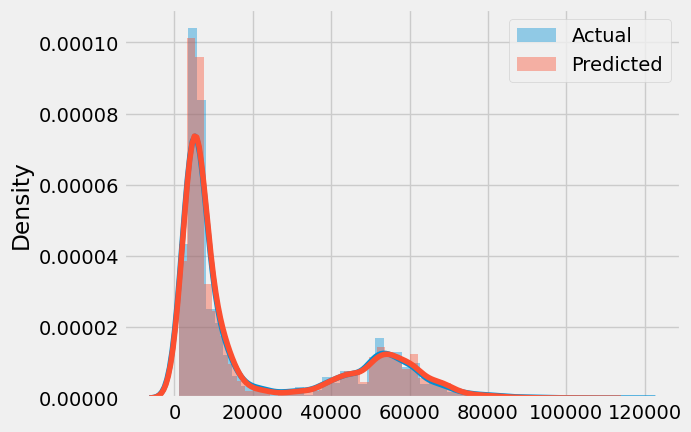

In [73]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()